## CS/INFO 5304 Assignment 1: Data Preparation <br />


In [2]:
def format_plot(ax, xlab = "", ylab = "", title = "", legend = False, xticks = None, yticks = None,
                xticks_labels = None, xticks_rotation = "horizontal"):
    ax.set_xlabel(xlab,  fontsize = 14)
    ax.set_ylabel(ylab,  fontsize = 14)
    ax.set_title(title,  fontsize = 16, fontweight = "bold")
    if legend:
        ax.legend(fontsize = 14)
    
    if xticks is not None:
        ax.set_xticks(xticks)
    if xticks_labels is not None:
        ax.set_xticklabels(xticks_labels, rotation = xticks_rotation, fontsize=8)
    
    if yticks is not None:
        ax.set_yticks(yticks)

def custom_box_plot(ax, data):
    c, fc = "navy", "lightblue" 
    bp0 = ax.boxplot(data, widths = 1.5, vert = False, patch_artist = True, 
                     capprops = dict(color = c, linewidth = 6), 
                     whiskerprops = dict(color = c, linewidth = 4),
                     medianprops = dict(color = c, linewidth = 3), 
                     flierprops = dict(color = c, markersize = 15,
                     markerfacecolor = fc, markeredgewidth = 3, markeredgecolor = c))

    for box in bp0['boxes']:
        box.set(color = c, linewidth = 4)
        box.set(facecolor = fc)
        box.set()    

## Question 2: Dealing with messy and missing data (40 points)


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

individual_df = pd.read_pickle("./data/p2/Extrasensory_individual_data.p")  
sensor_df = pd.read_pickle("./data/p2/Extrasensory_sensor_data.p")  

### Case 1: Actual screen time


#### Writeup Answer to Problem A: 
How are missing values represented for this feature?


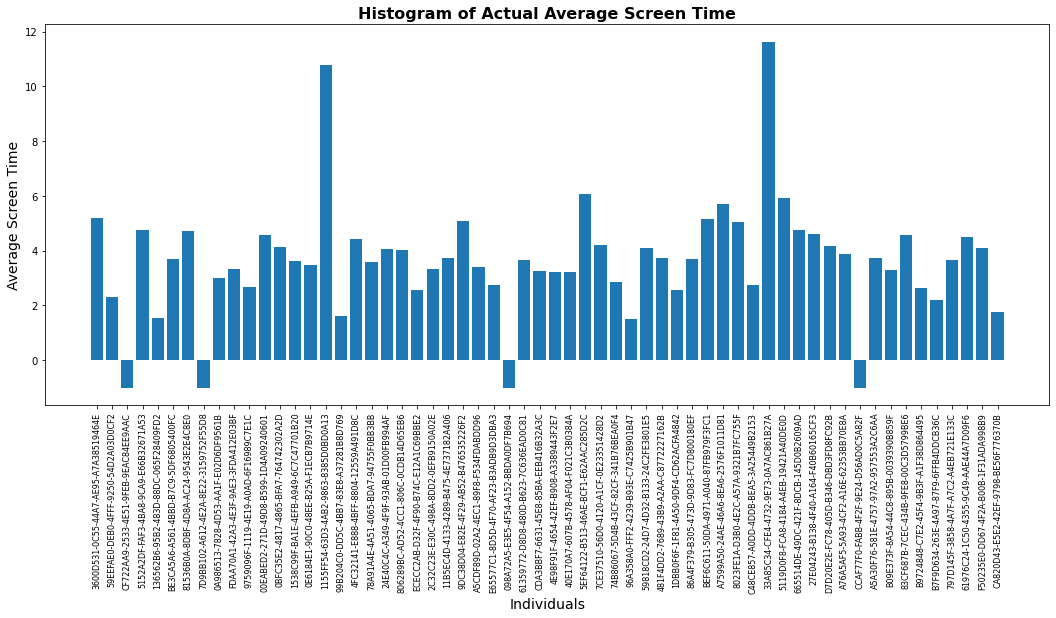

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(18, 7))

ax.bar(individual_df.index, individual_df["actual_average_screen_time"])

format_plot(ax, xlab = "Individuals", ylab = "Average Screen Time", xticks = individual_df.index,
            xticks_labels = individual_df["uuid"], xticks_rotation = "vertical", 
            title = "Histogram of Actual Average Screen Time")


<font color='blue'> 

Missing values are represented as -1, as shown in the histogram above.

#### Writeup Answer to Problem B: 
 Does it have outliers?If so, how many?
 Is it skewed? If so, is it left skewed or right skewed? What’s the skewness? 

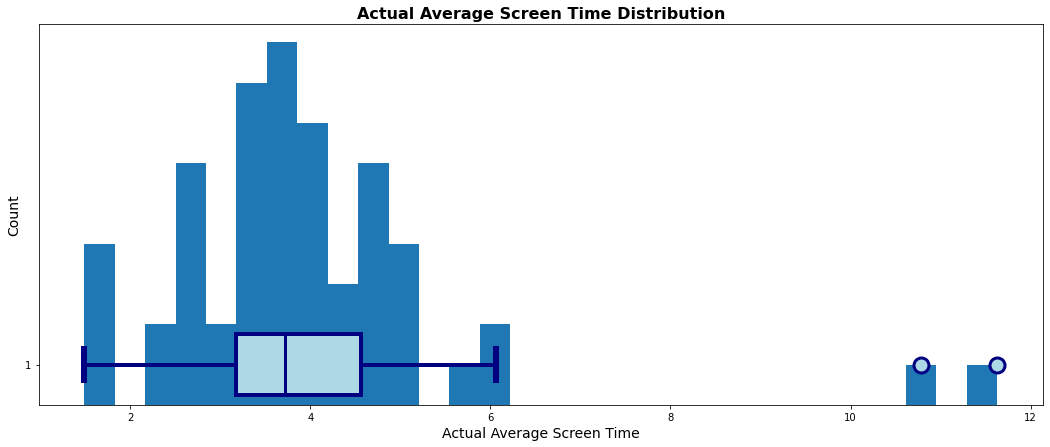

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(18, 7))

no_actual_nans_df = individual_df[individual_df["actual_average_screen_time"] != -1]
ax.hist(no_actual_nans_df["actual_average_screen_time"], bins = 30)

custom_box_plot(ax, no_actual_nans_df["actual_average_screen_time"])

format_plot(ax, xlab = "Actual Average Screen Time", ylab = "Count",
            title = "Actual Average Screen Time Distribution")


In [6]:
from scipy.stats import skew
skewness = skew(individual_df["actual_average_screen_time"])

print("Skewness in the data: ", round(skewness, 4))

Skewness in the data:  0.8798


<font color='blue'> 

Visually from the box-plot above, we can identify two outlier, represented by the two dots on the bars between 10-12hrs of screen time. The formula used by the box-plot function to identify outliers is the one used in class.

Furthermore, we can see that the data is slightly positively skewed, given that the median is closer to the left side of the box-plot. That is confirmed using the scipy stat function used above on the data to plot the skewness coefficient = 0.8798

#### Writeup Answer to Problem C: 
How did you choose the random value from method 3)? 
How do the distributions look like after you implement the three filling methods? (Compare them)


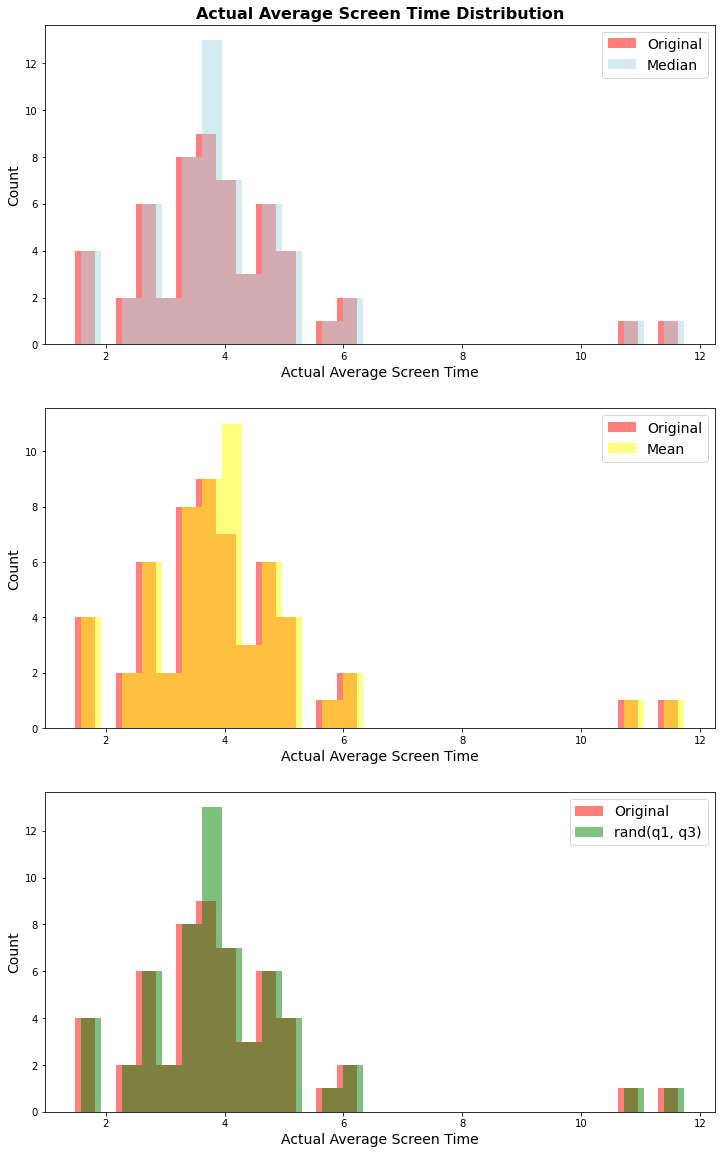

In [40]:
import random
fig, ax = plt.subplots(3, 1, figsize = (12, 20))
bins = 30

# 1) flling with median
ax[0].hist(no_actual_nans_df["actual_average_screen_time"], bins = bins,
        color = "red", alpha = 0.5, label = "Original")

median_nan_df = individual_df.copy()
median_nan_df["actual_average_screen_time"] = individual_df["actual_average_screen_time"] \
    .replace(-1, no_actual_nans_df["actual_average_screen_time"].median())

ax[0].hist(median_nan_df["actual_average_screen_time"] + 0.1,  bins = bins,
        color = "lightblue", alpha = 0.5, label = "Median")

format_plot(ax[0], xlab = "Actual Average Screen Time", ylab = "Count", legend = True, 
            title = "Actual Average Screen Time Distribution")


# 2) filling with mean
ax[1].hist(no_actual_nans_df["actual_average_screen_time"], bins = bins,
        color = "red", alpha = 0.5, label = "Original")

mean_nan_df = individual_df.copy()
mean_nan_df["actual_average_screen_time"] = individual_df["actual_average_screen_time"] \
    .replace(-1, no_actual_nans_df["actual_average_screen_time"].mean())

ax[1].hist(mean_nan_df["actual_average_screen_time"] + 0.1, bins = bins, 
           alpha = 0.5, color = "yellow", label = "Mean")


format_plot(ax[1], xlab = "Actual Average Screen Time", ylab = "Count", legend = True)

# 3) filling with a random value within range of your choice
ax[2].hist(no_actual_nans_df["actual_average_screen_time"], bins = bins,
        color = "red", alpha = 0.5, label = "Original")

first_third_quartiles = no_actual_nans_df["actual_average_screen_time"].quantile([0.25, 0.75])
rand_within_box_nan_df = individual_df.copy()
rand_within_box_nan_df["actual_average_screen_time"] = individual_df["actual_average_screen_time"] \
    .replace(-1, random.uniform(first_third_quartiles.iloc[0], first_third_quartiles.iloc[1]))

ax[2].hist(rand_within_box_nan_df["actual_average_screen_time"] + 0.1, 
           color = "green", bins = bins, alpha = 0.5, label = "rand(q1, q3)")

format_plot(ax[2], xlab = "Actual Average Screen Time", ylab = "Count", legend = True)


<font color=blue>
    
For the third nan-filling method, I wanted to introduce some randomness as I believe it would be more robust against outliers than just utilizing the same value (mean or median) to fill missing data. I chose the boundaries of the random generations to be the first and third quartile.

Concerning how the distributions look after nan-filling, it seams that the median is lower than the mean and therefore the light-blue bars have a peak around 3.7, mean instead peaks just after the four hour mark. The curve of the random method peaks very similarly to the median one, which makes sense given that the bin that contains the median value also encompasses large part of the range [first-quartile - third-quartile].

#### Answer to Problem D: 
Report the three p-values. Which one of the filling methods reconstruct this feature to be closest to the research distribution? Why do you think this is the case?


In [52]:
import numpy as np
from scipy.stats import ttest_ind

research_distribution = np.random.normal(3.85, 1.25, len(median_nan_df.index))

_, p_median = ttest_ind(median_nan_df["actual_average_screen_time"], research_distribution)
_, p_mean = ttest_ind(mean_nan_df["actual_average_screen_time"], research_distribution)
_, p_rand = ttest_ind(rand_within_box_nan_df["actual_average_screen_time"], research_distribution)

p_values_df = pd.DataFrame([["Median", p_median], ["Mean", p_mean], ["Rand", p_rand]],
                           columns = ['Distribution', 'P-Value'])

display(p_values_df.sort_values(by = 'P-Value', ascending = False))

Distribution   P-Value
2         Rand  0.897909
0       Median  0.887721
1         Mean  0.837195

<font color=blue>
    
I computed the three p-values and reported them above. I think the randomized method  is slightly better at matching the research distribution thanks to its robustness given by generating different values within a sensible range, rather than oversampling the median value. This could be visualized more clearly if we had more data points hence we could increment the number of bins, which would show that while the median and mean methods result in peaks for one single value/bin, the randomized method better distributes uknown values across the interquartile range bins.

### Case 2: Perceived average screen time

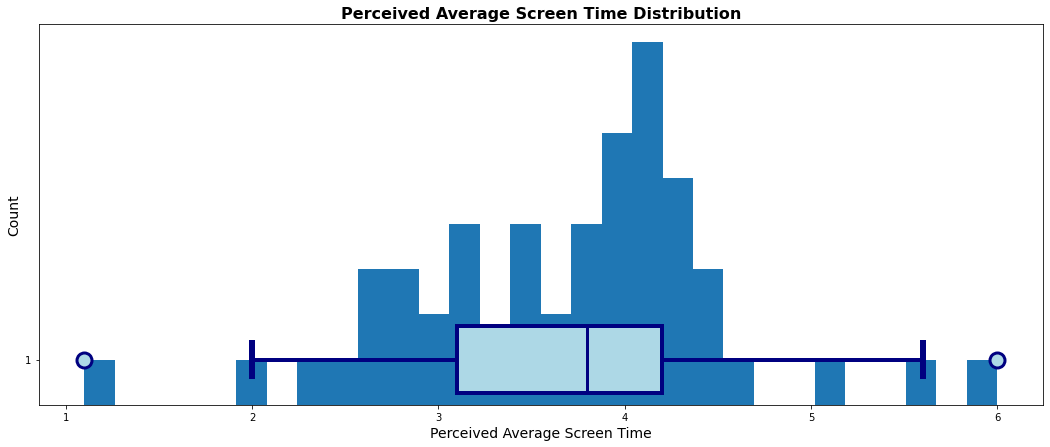

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(18, 7))

c, fc = "navy", "lightblue" 

no_preceived_nans_df = individual_df[individual_df["perceived_average_screen_time"] != -1]
ax.hist(no_preceived_nans_df["perceived_average_screen_time"], bins = 30)

custom_box_plot(ax, no_preceived_nans_df["perceived_average_screen_time"])

format_plot(ax, xlab = "Perceived Average Screen Time", ylab = "Count", 
            title = "Perceived Average Screen Time Distribution")


#### Writeup Answer to Problem B: 
 Does it have outliers?If so, how many? 
 Is it skewed? If so, is it left skewed or right skewed? What’s the skewness? 


In [10]:
from scipy.stats import skew
skewness = skew(no_preceived_nans_df["perceived_average_screen_time"])

print("Skewness in the data: ", round(skewness, 4))

Skewness in the data:  -0.2083


<font color='blue'> 

Visually from the box-plot above, we can identify two outlier, represented by the two dots on the bar just over the 1hour mark and the one at the 6 hour mark respectively. 

Furthermore, we can see that the data is slightly negatively skewed, given that the median is closer to the right side of the box-plot and the right whisker is slightly longer than the left. That is confirmed using the scipy stat function used above on the data to plot the skewness coefficient = -0.2083

How many of them are intense phone users?

In [17]:
intense_user_threshold = no_actual_nans_df["actual_average_screen_time"].mean() + \
                         no_actual_nans_df["actual_average_screen_time"].std()

print("Intense User Threshold: ", round(intense_user_threshold, 3), "hrs")

Intense User Threshold:  5.732 hrs


In [18]:
intense_users_df = no_actual_nans_df.copy()
intense_users_df["intense_user"] = intense_users_df["actual_average_screen_time"].apply(
    lambda x: x > intense_user_threshold)

print("Number of intense users: ", intense_users_df["intense_user"].values.sum(), "/", len(intense_users_df))

Number of intense users:  4 / 56


What is the p-value? Do you think they are correlated? What does this mean? Do you think this feature is MAR or MNAR? 

In [19]:
intense_users_df["no_perceived_screen_time"] = intense_users_df["perceived_average_screen_time"].apply(
    lambda x: x == -1)

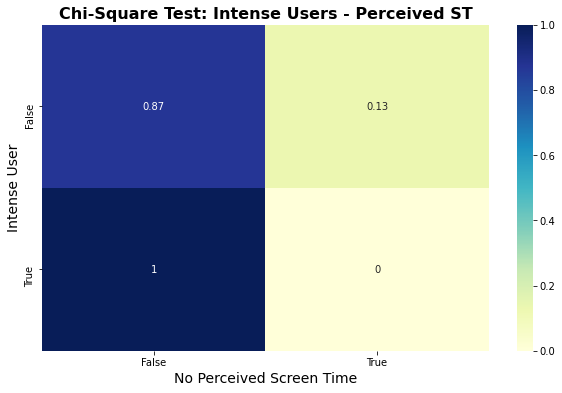

In [14]:
import seaborn as sns
from scipy.stats import chi2_contingency

contigency_pct = pd.crosstab(intense_users_df["intense_user"], 
                             intense_users_df["no_perceived_screen_time"], normalize='index')

_, p_value, _, _ = chi2_contingency(contigency_pct)

fig, ax = plt.subplots(1, 1, figsize = (10, 6))
sns.heatmap(contigency_pct, annot = True, cmap = "YlGnBu")

format_plot(ax, xlab = "No Perceived Screen Time", ylab = "Intense User",
            title = "Chi-Square Test: Intense Users - Perceived ST")
plt.show()


In [15]:
print("P-Value: ", p_value)

P-Value:  0.012426770691443979


<font color=blue>
    
A p-value of 0.31 suggests that although there is some correlation, it is not significant enough to reject the null hypothesis, yielding to the two binomial distributions being independent.
However, from a visual inspection of the data, it is clear that the perceived screen time is not Missing At Random. While virtually all non-intense users report a perceived screen time (94%), only 56% of intense users do so. 
    
So I would argue that the two binomial distributions are partially correlated, hence MNAR.


### Case 3: Location

#### Answer to Problem A: 

In [94]:
## Case 3 Problem A code (graph)

cols = ['User', 'Location-NoBattery Correlation']
no_loc_on_low_battery_users = pd.DataFrame(columns = cols)
correlation_threshold = 0.8

for curr_user in sensor_df.keys():
    curr_user_df = sensor_df[curr_user]
    no_loc_count = len(np.where(curr_user_df["location:raw_latitude"].isna())[0])
    no_loc_due_to_battery_count = len(np.where((curr_user_df["location:raw_latitude"].isna()) & 
                                               (curr_user_df["lf_measurements:battery_level"] <= 0.2))[0])
    
    perc_no_loc_due_to_battery = no_loc_due_to_battery_count / no_loc_count if no_loc_count > 0 else 0
    
    if perc_no_loc_due_to_battery > correlation_threshold:
        row_df = pd.DataFrame([[curr_user, perc_no_loc_due_to_battery]], columns = cols)
        no_loc_on_low_battery_users = pd.concat([no_loc_on_low_battery_users, row_df])

display(no_loc_on_low_battery_users.sort_values(by = [cols[1]], ascending = False))

User  Location-NoBattery Correlation
0  B09E373F-8A54-44C8-895B-0039390B859F                        1.000000
0  B7F9D634-263E-4A97-87F9-6FFB4DDCB36C                        0.931452
0  098A72A5-E3E5-4F54-A152-BBDA0DF7B694                        0.929897

<font color=blue>
    
To identify people who might have a "battery saver" setting that disconnects the location when on low battery ($<20\%$), I have chosen a correlation threshold of $0.8$, i.e. I am selecting only users where the ratio (times_with_no_location) / (times_on_low_battery_and_no_location) is over $80\%$.This method results in only three users. However, the fourth highest correlation coefficient observed in a user in the dataset is of $0.598$, as visible if dropping the correlation_threshold below this value and rerun the cell above. This huge gap between the first three users and the rest led me to cluster only them as battery saver users.

#### Answer to Problem B: 


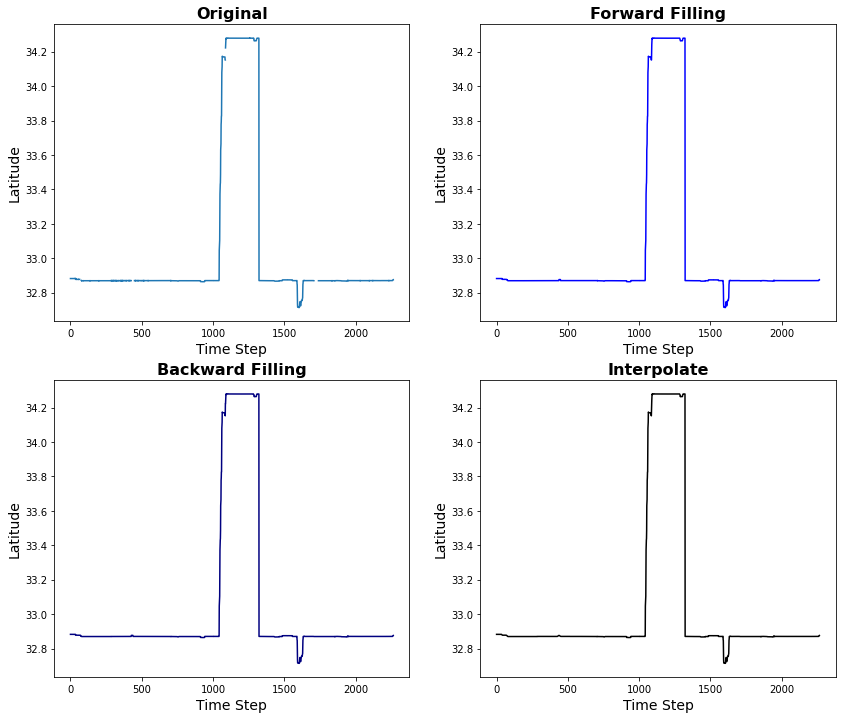

In [113]:
user_lat = sensor_df["F50235E0-DD67-4F2A-B00B-1F31ADA998B9"]["location:raw_latitude"]

ffill_user_lat = user_lat.ffill()
bfill_user_lat = user_lat.bfill()
intpt_user_lat = user_lat.interpolate()

fig, ax = plt.subplots(2, 2, figsize = (14, 12))

ax[0, 0].plot(user_lat, label = "Original")
ax[0, 1].plot(ffill_user_lat, label = "Ffill", color = "blue")
ax[1, 0].plot(bfill_user_lat, label = "Bfill", color = "navy")
ax[1, 1].plot(intpt_user_lat, label = "Interpolate", color = "black")

format_plot(ax[0, 0], xlab = "Time Step", ylab = "Latitude", title = "Original")
format_plot(ax[0, 1], xlab = "Time Step", ylab = "Latitude", title = "Forward Filling")
format_plot(ax[1, 0], xlab = "Time Step", ylab = "Latitude", title = "Backward Filling")
format_plot(ax[1, 1], xlab = "Time Step", ylab = "Latitude", title = "Interpolate")


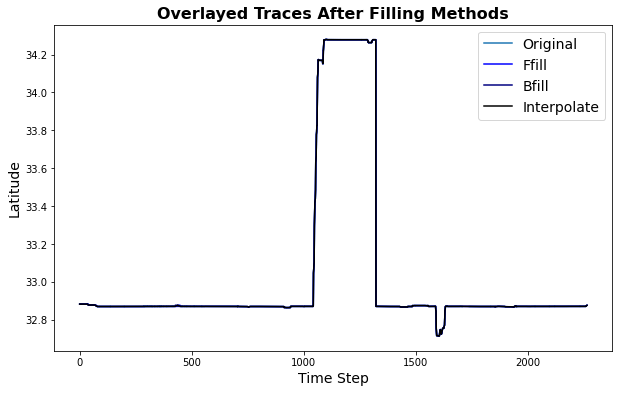

In [118]:
fig, ax = plt.subplots(1, 1, figsize = (10, 6))

ax.plot(user_lat, label = "Original")
ax.plot(ffill_user_lat, label = "Ffill", color = "blue")
ax.plot(bfill_user_lat, label = "Bfill", color = "navy")
ax.plot(intpt_user_lat, label = "Interpolate", color = "black")

format_plot(ax, xlab = "Time Step", ylab = "Latitude", 
            title = "Overlayed Traces After Filling Methods", legend = True)

<font color=blue>
    
The four traces are extremely similar, since there are almost no missing values, except for a small portion of the trace just before the time-step 500, on the final part of the increasing step towards the peak and just after stabilizing again after the global maxima, which are visible in the individual plot of the original trace.
    
Although all methods are very similar, in using this dataset I would use the linear interpolation method, since logically it makes more sense to fit small holes in location data by linearly interpolating the position of the subject and assume it is moving in linear motion, rather than using the previous or next non-missing value.